In [1]:
import numpy as np
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
assert egrid.shape == (406, 964)
from impacts import IMPAaCS
import pickle as pkl

In [2]:
impact_boundz=20
[-impact_boundz, impact_boundz]
I = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-impact_boundz, impact_boundz], lat_lims = [-impact_boundz, impact_boundz])
new_lat=[]
new_lon=[]
for i in I.lon_subset:
    if np.abs(i)<20:
        new_lon.append(i)
for i in I.lat_subset:
    if np.abs(i)<20:
        new_lat.append(i)
I.lon_subset = new_lon
I.lat_subset = new_lat
I.n_x = len(I.lon_subset)
I.n_y = len(I.lat_subset)

cube volume 2596.6418774091976, in km^3
sample area 19350175.27045334, in km^2
our sample represents 0.038 of earth's surface area
we need to multiply our volume by 26.234 to correct for sample/earth area
multiply n_cubes by 68121.0 to get crust volume [km^3] on earth
divide by 7200000000.0 to get relative percent crust volume
the final multiplier to get relative percent volume crust is 9.461249582997852e-06


In [3]:
CHARDICT = {"mean":149, "5th":138, "95th":6}

plotting SiO2 map for layers [0], and distribution for layer 0


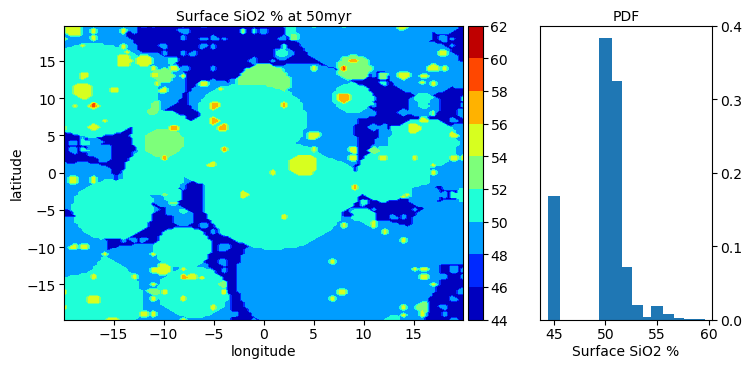

plotting SiO2 map for layers [0], and distribution for layer 0


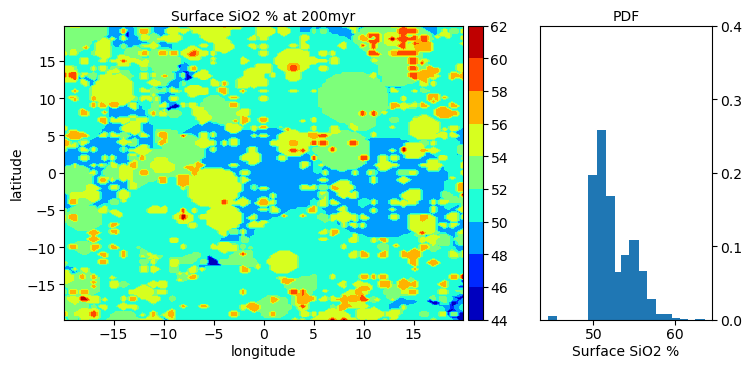

plotting SiO2 map for layers [0], and distribution for layer 0


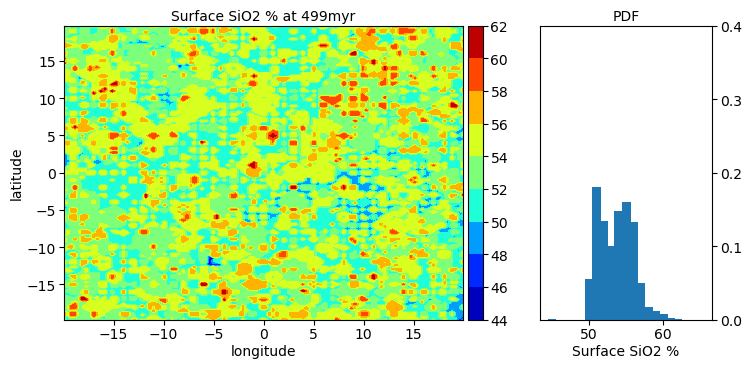

plotting SiO2 map for layers [0], and distribution for layer 0


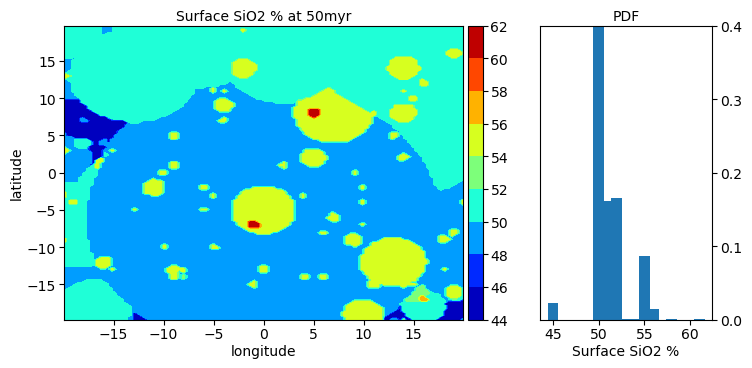

plotting SiO2 map for layers [0], and distribution for layer 0


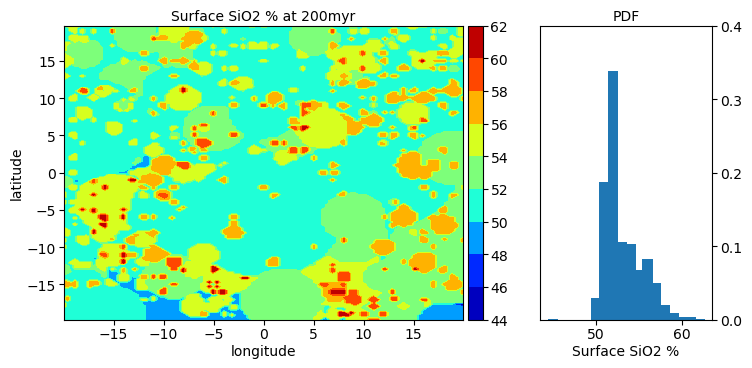

plotting SiO2 map for layers [0], and distribution for layer 0


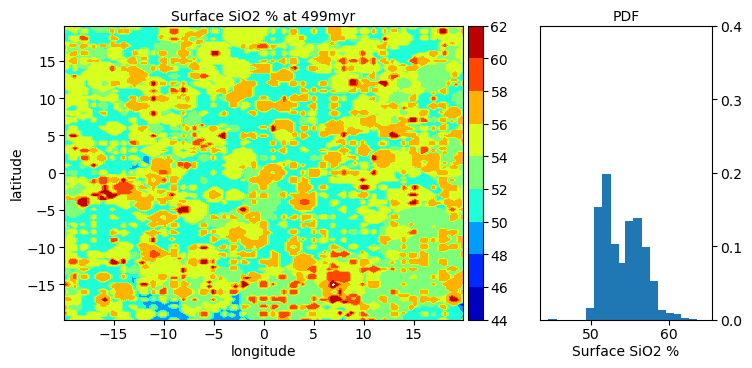

plotting SiO2 map for layers [0], and distribution for layer 0


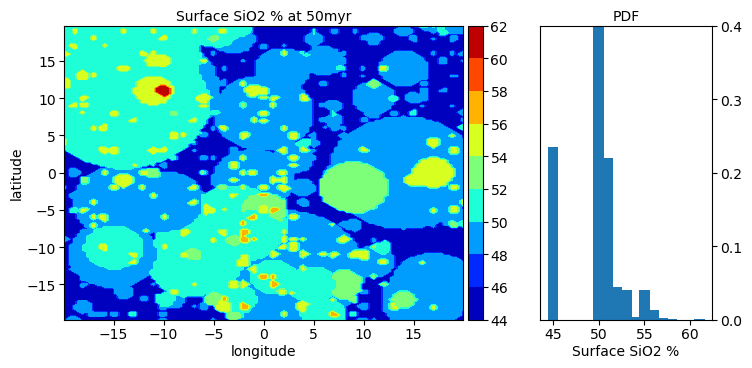

plotting SiO2 map for layers [0], and distribution for layer 0


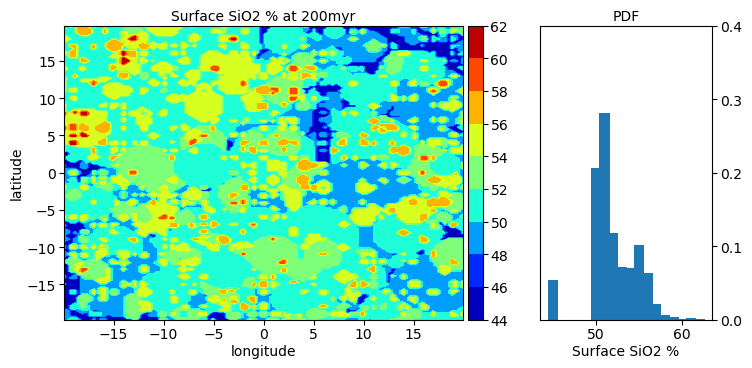

plotting SiO2 map for layers [0], and distribution for layer 0


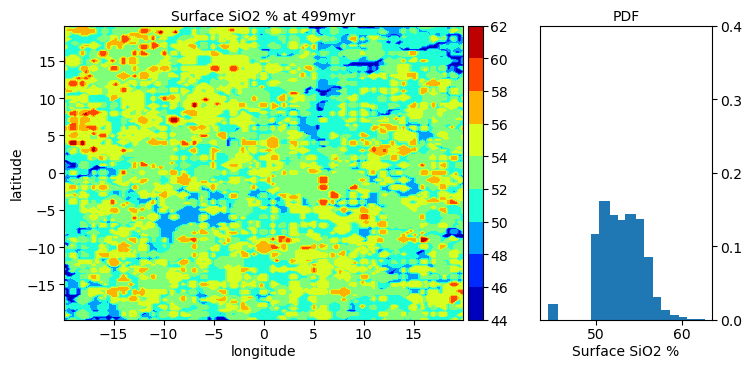

In [4]:
for CHAR in CHARDICT.keys():
    ENS = CHARDICT[CHAR]
    for t in [50, 200, 499]:
        state_file = '/media/volume/ml_ngen/impaacs/impact_states/july2025/{}/{}.pkl'.format(ENS, t)
        with open(state_file, 'rb') as fb:
            impact_states = pkl.load(fb)
        I.grid_cell_state = impact_states
        I.sim_time=t*1000000
        I.do_volume_by_layer(n_layers=4)
        I.plot_map_and_bar(save_figure=True, 
                           plot_figure=True, map_layers=[0], 
                           dist_layer=0, 
                           fig_path=f"./figs/map_and_bar_{CHAR}_ENS{ENS}_")


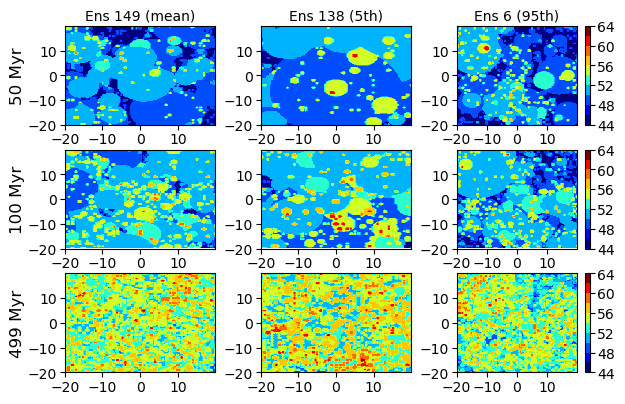

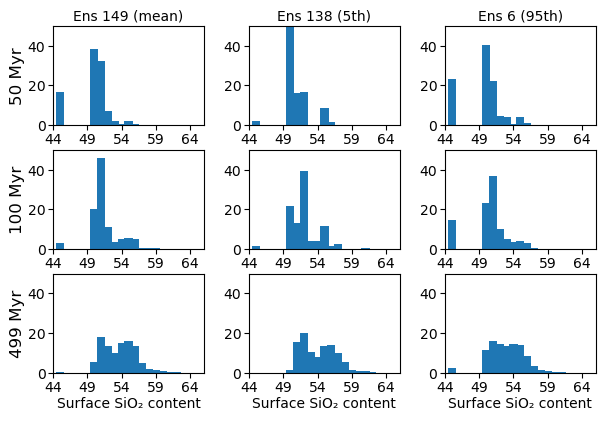

In [5]:
I.plot_3x3_map(CHARDICT["mean"], 
               CHARDICT["5th"], 
               CHARDICT["95th"], 
               plot_figure=True, map_layers=[0], dist_layer=0)
I.plot_3x3_distributions(CHARDICT["mean"], 
                         CHARDICT["5th"], 
                         CHARDICT["95th"], 
                         plot_figure=True, dist_layer=0)